# Customer Segmentation Using K-Means Clustering
---

**Problem Statement**
Segment customers of a retail store into distinct groups based on their purchase history using the K-means clustering algorithm. This helps the business better understand customer behavior and tailor marketing strategies accordingly.

**Approach**

- Data Loading and Exploration: Load the customer dataset and explore its structure.
- Data Preprocessing: Handle missing values, scale features, and select relevant columns for clustering.
- Choosing K (Number of Clusters): Use the Elbow Method to determine the optimal number of clusters.
- Model Training: Fit the K-means algorithm to the data.
- Cluster Assignment: Assign each customer to a cluster.
- Visualization: Visualize clusters for interpretation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Load Data**

In [11]:
data = pd.read_csv('ML Projects/Customer Segmentation Using K-Means Clustering/Mall_Customers.csv')

**Data Exploration**

In [15]:
print("First 5 rows:\n", data.head())
print("\nData Info:\n", data.info())
print("\nSummary Statistics:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())

First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Data Info:
 None

Summary Statistics:
  

**Feature Selection**

In [18]:
features = ['Annual Income (k$)','Spending Score (1-100)']
X = data[features]

**Data Scaling**

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Elbow Method to Find Optimal K**

In [24]:
inertia = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\seema\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\seema\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\seema\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\seema\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

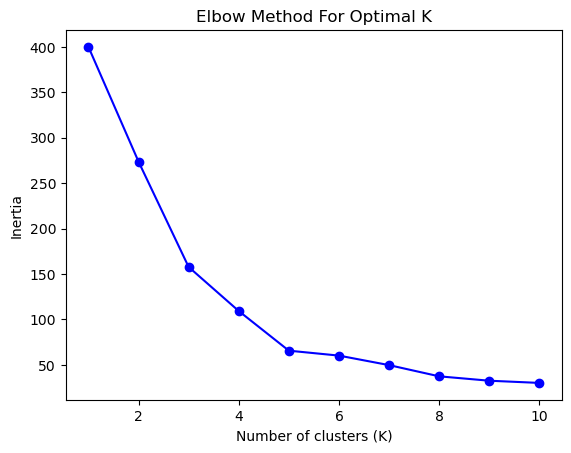

In [26]:
plt.plot(K_range,inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

**Fit KMeans with Optimal K**

In [29]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

C:\Users\seema\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Visualize Clusters**

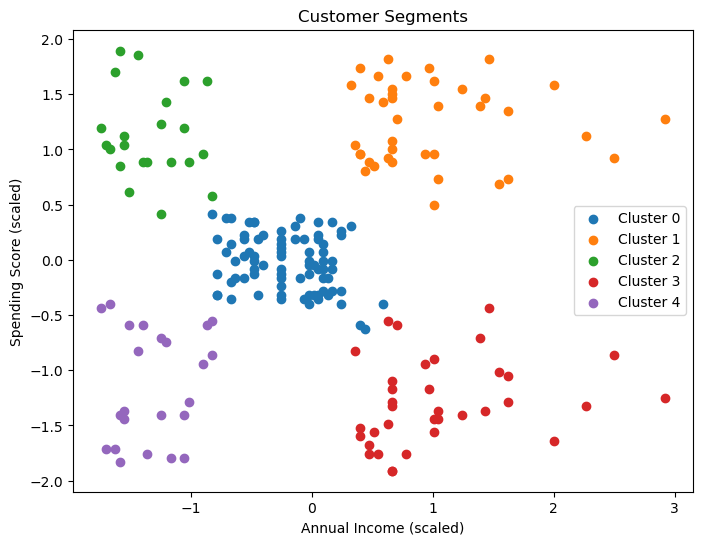

In [32]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        X_scaled[clusters == cluster, 0],
        X_scaled[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.legend()
plt.show()

**Conclusion**
--
K-means clustering effectively segments retail customers based on their purchasing behavior. This segmentation enables targeted marketing, personalized offers, and improved customer satisfaction. The Elbow Method is a practical approach for selecting the number of clusters.